<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import numpy as np 
import math

m = 100
n = 2
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([ 9.01, -1.47,  2.36, -5.2 , -6.74,  7.75,  9.95,  3.14,  6.4 ,
       -8.4 ,  2.92,  3.97, -7.92,  9.95,  6.6 ,  7.77,  9.15,  4.72,
        1.1 , -8.06, -4.62,  0.38, -8.08, -9.23, -6.07, -7.19, -1.06,
       -6.05, -4.5 , -1.95, -2.28, -2.55, -9.53,  4.12, -4.68,  2.56,
       -1.68,  9.91, -9.47,  1.74,  5.38,  6.1 , -5.02,  4.74, -2.43,
       -5.18,  9.85, -5.37,  2.34,  8.58,  5.77, -3.63, -5.74,  9.9 ,
       -8.55,  3.37, -3.32, -0.79,  3.87, -8.29,  8.48, -3.63,  3.24,
       -1.79, -1.82,  6.98,  5.03,  6.33, -9.02, -0.34, -6.75,  4.51,
       -3.16,  8.55,  5.85,  7.3 , -6.86, -2.55,  4.86, -1.74,  1.97,
        5.86,  5.14, -0.45,  0.31, -0.14,  1.01,  1.43, -9.73, -7.88,
       -9.79,  8.45, -0.75, -5.32, -5.95, -0.21, -6.41, -5.79,  8.93,
        1.65])

In [302]:
x = np.random.randint(1,20, n)
print(x)

[15 13]


In [312]:
def f(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return np.log(totalsum)
f(x)


In [313]:
def fsinLog(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return totalsum
fsinLog(x)

In [314]:
def fdx(x):
    # print(x)
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j+1
        aux2 = math.exp(totalexp)*a.item(i-1,0)
        #print(aux2)
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,1)
        #print(aux2)

        totalsum2 = totalsum2 + aux2
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2])

print(fdx(x))

[7.17003057 9.65000425]


In [315]:
def backtrack4(x0, f, fdx, t = 1, alpha = 0.4, beta = 0.9):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
        #  print(t)
    return t

backtrack4(x, f, fdx)

In [245]:
backtrack4([0.1,0.5],f,fdx)

In [349]:
def backtrack5(x0, f, deltax, t = 1, alpha = 0.4, beta = 0.9):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,deltax)) > f(point) + alpha * t * (np.dot(np.transpose(deltax), -1*deltax)):
         t = t*beta
        #  print(t)
    return t

backtrack5(x, f,np.array([5,1]))

In [317]:
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.0001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0), iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

grad(x, 50)

[7.82996943 3.34999575] 101.27592025648157 [7.169335   9.63134678] 1
[ 3.12616873 -2.96913087] 59.30898536904638 [ 9.00693298 -6.59316573] 2
[-1.18181939  0.18435986] 29.234393456605435 [-8.55291116  5.26226857] 3
[-0.49958409 -0.23539259] 25.93697496029752 [-7.38211644 -8.98283254] 4
[-0.07031596  0.28695676] 22.34578239913927 [-0.24817618  5.96400341] 5
[-0.05979548  0.03413575] 21.644304321639947 [-2.10163649 -1.32722352] 6
[0.00515172 0.07515114] 21.56025690876736 [-0.29889035  0.95200608] 7
[0.02079407 0.02532813] 21.539312960925308 [-0.68855313 -0.39981535] 8
[0.04443681 0.03905653] 21.5303102822159 [-0.05325081  0.34693982] 9
[0.04694499 0.02271521] 21.52796429948985 [-0.23079143 -0.10174339] 10
[0.05575016 0.02659693] 21.526953750605056 [-0.01387268  0.13316609] 11
[0.05633823 0.02095187] 21.526612868889625 [-0.08034984 -0.02203483] 12
[0.05974436 0.02188595] 21.52648232871274 [-0.00455543  0.05165877] 13
[0.05993747 0.01969607] 21.52643165238034 [-0.03101421 -0.00848767] 14
[0

(array([0.06220286, 0.01890649]), 21.526399852177377, 28)

In [318]:
x00= np.arange(-1, 1, 0.01)
#print(x0)
y=[]
for i in x00:
    y.append(f([-0.019501,i]))
    #print(f([0.1,i]))

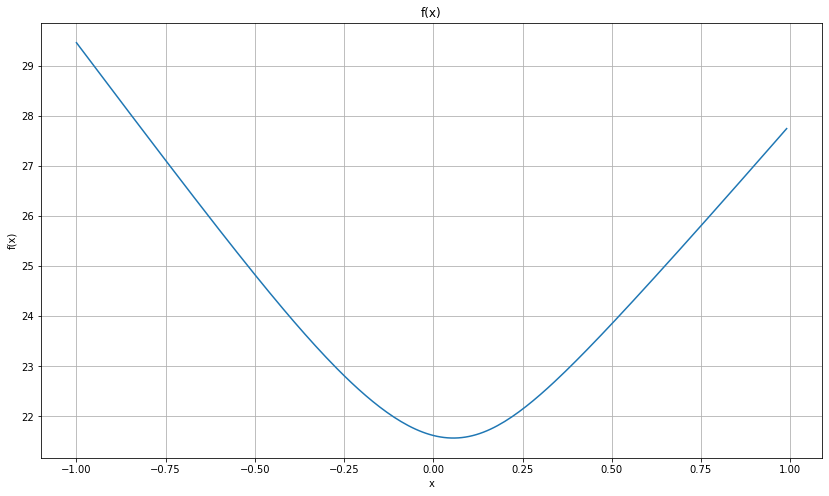

por evaluaciónes: 21.56739505456929
por optimización: 21.61922226986039


In [319]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(x00,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print("por evaluaciónes: "+str(min(y)))
print("por optimización: "+str(f([-0.019501 , -0.0005068])))

In [320]:
def Hessian(x0,fdx): #punto y derivada
  dt=0.0000000001
  dxdx=( fdx( [ x0[0]+dt , x0[1] ] )[0] - fdx(x0)[0] ) / dt
  dxdy=( fdx( [ x0[0]+dt , x0[1] ] )[1] - fdx(x0)[1] ) / dt
  dydx=( fdx( [ x0[0] , x0[1]+dt ] )[0] - fdx(x0)[0] ) / dt
  dydy=( fdx( [ x0[0] , x0[1]+dt ] )[1] - fdx(x0)[1] ) / dt
  return[[dxdx,dxdy],[dydx,dydy]]

In [368]:
import numpy.linalg as npla
x=[1,1]

def lambda_sq(fdx, Hessian, point):
    lambda_sq1 = np.dot( np.dot( fdx(point) , npla.pinv( Hessian(point,fdx) ) ), fdx(point).T) 
    return lambda_sq1.item() 
     
def delta_x(fdx, Hessian, point):
    delta_x = np.dot(-npla.pinv(Hessian(point,fdx)) , fdx(point).T)
    return delta_x

#eps is the tolerance condition to exit out of the while loop
def newtons_method(x, eps=0.0001, max_iters=50):
    iters = 1
    lmb_sq = lambda_sq(fdx, Hessian, x)
    #In while loop we are checking the magnitude of Newton's decrement. If it's below tolerance we exit out.
    while(( ((lmb_sq)**2)/2.0) > eps):
        dlt_x = delta_x(fdx, Hessian, x) # Compute delta_x and lambda_sq
        #print(fdx(x))
        #print(dlt_x)
        #Line search for stepsize
        #t=0.08
        t = backtrack4(x, f, fdx, 0.2, 0.25)
        #t =backtrack5(x, f, dlt_x)
        #print(t)
        # Update x
        x = np.array((x + np.dot(t , dlt_x)))
        #print(x)
        # Update lmb_sq, see if we still stay in the loop
        lmb_sq = lambda_sq(fdx, Hessian, x)   
        #print(lmb_sq) 
        iters = 1 + iters  
        if(iters > max_iters):
            break
    return x, f(x), iters
#Test
newtons_method(x)

2.816305367540815
2.208569846941394
1.9911213278885758
1.9397747097392153
1.7640082959204335
1.0227862520309603
0.5442913945486493
0.32974340531897856
0.2105617218085241
0.14581921981342172
0.10295230806208557
0.07370396500786988
0.0551963391001712
0.041593365121157806
0.03149813365115713
0.02394853488042279
0.01826817676634052
0.013973000772767984


(array([ 0.09153003, -0.00668862]), 21.53314970778717, 19)

In [190]:
xx=[2,2]
lambda_sq(fdx, Hessian, xx)
dlt_x = delta_x(fdx, Hessian, xx)
print(dlt_x)
print(xx + dlt_x)
t=2
np.array((xx + np.dot(t , dlt_x)))
print(np.array((xx + np.dot(t , dlt_x))))

[ 1734.71185664 -5571.04940551]
[ 1736.71185664 -5569.04940551]
[  3471.42371329 -11140.09881102]


In [151]:
Hessian([1,1],fdx)

In [200]:
newtons_method([1,1])

(array([0.56718975, 0.62481681]), 25.313336066132692, 4)